## Практическая работа №9 - Методы кластеризации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dsmltf import scale, KMeans, is_leaf, generate_clusters, get_children, distance

In [2]:
data = []
r_file = pd.read_csv("data.csv", delimiter=',').values.tolist()
for row in r_file:
    data.append([1 if row[1] == "Male" else 0, row[2], row[3], row[4]])

data = scale(data)

In [3]:
clast = KMeans(7)
clast.train(data)
print(clast.means)

[[1.1281521496355325, 1.4604521348897253, -1.3649387871825802, -1.5295694920343252], [1.1281521496355325, -0.6351352036252615, 2.91767116589028, 1.2733471913382197], [-0.8864052604279183, 0.3695984518271294, 0.66567484475571, -1.172411133488239], [-0.8864052604279183, -0.5633685139500907, -0.78476346377164, -0.31833679783455504], [1.1281521496355325, -0.49160182427491994, 2.91767116589028, -1.2500542549113012], [-0.8864052604279183, 1.517865486629862, -0.4030691720539163, -0.04658587285383742], [-0.8864052604279183, -0.9939686520011154, 0.4366582697250758, -0.6289092835268038], [1.1281521496355325, 1.446098796954691, 0.39848884055330347, -1.521805179892019], [1.1281521496355325, -0.7069018933004323, -1.2427966138329085, 1.2345256306266885], [1.1281521496355325, -1.496335479727311, -0.059544309507964986, -0.3571583585460862], [1.1281521496355325, -0.9222019623259446, -0.25039145536682683, 0.14752193070381803], [-0.8864052604279183, -1.0657353416762863, -1.5481520472070873, 1.04041782706

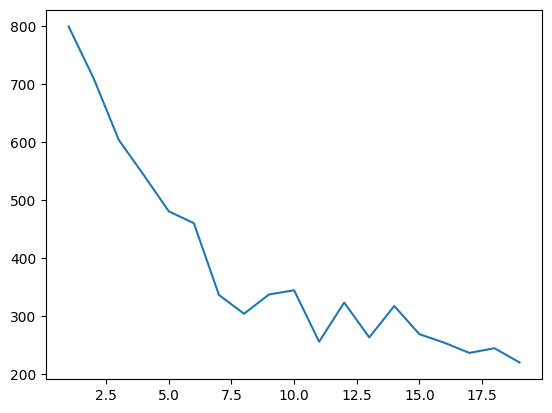

In [4]:
from error import squared_errors

x = []
y = []

for k in range(1, 20):
    x.append(k)
    y.append(squared_errors(data, k))

plt.plot(x, y)

In [5]:
def bottom_up_cluster(inps, distance_agg=min):
    clusters = [(inp,) for inp in inps]
    while len(clusters) > 1:
        c1, c2 = min([(cluster1, cluster2)
                      for i, cluster1 in enumerate(clusters)
                      for cluster2 in clusters[:i]],
                     key=lambda x: cluster_distance( *x, distance_agg))
        clusters = [c for c in clusters if c != c1 and c != c2]
        merged_cluster = (len(clusters), [c1, c2])
        clusters.append(merged_cluster)
    return clusters[0]

def get_values(cluster):
    if is_leaf(cluster):
        return [cluster[0]]
    else:
        return [val for child in get_children(cluster) for val in get_values(child)]

def cluster_distance(cluster1, cluster2, distance_agg=min):
    values1 = list(get_values(cluster1))
    values2 = list(get_values(cluster2))
    return distance_agg([distance(list(inp1), list(inp2)) for inp1 in values1 for inp2 in values2])

In [6]:
base_claster = bottom_up_cluster(data)
print([get_values(cluster) for cluster in generate_clusters(base_claster, 7)])

[[[-0.8864052604279183, -1.3528021003769692, -1.700829763894177, -1.7159129834496745]], [[1.1281521496355325, -1.42456879005214, -1.7389991930659492, -0.43480147996914836]], [[1.1281521496355325, 2.020232314356057, -1.5863214763788598, -1.4053404977574258], [1.1281521496355325, 1.804932245330545, -1.5863214763788598, -1.8323776655842676], [1.1281521496355325, 1.517865486629862, -1.1664577554893638, -1.7935561048727366], [1.1281521496355325, 1.0154986589036665, -1.0519494679740466, -1.7935561048727366]], [[1.1281521496355325, -0.6351352036252615, 2.91767116589028, 1.2733471913382197], [1.1281521496355325, -0.49160182427491994, 2.4978074450007837, 0.9239531449344399]], [[1.1281521496355325, -0.49160182427491994, 2.91767116589028, -1.2500542549113012]], [[1.1281521496355325, -0.41983513459974914, 2.001604865767743, -1.6382698620266123]], [[-0.8864052604279183, -0.2763017552494076, -1.4336437596917704, 1.8556706020111862], [-0.8864052604279183, -0.2763017552494076, -1.5863214763788598, 1.8